<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-将10W条数据写入sample_train_user.csv" data-toc-modified-id="1.-将10W条数据写入sample_train_user.csv-1">1. 将10W条数据写入sample_train_user.csv</a></span></li><li><span><a href="#2.-加载数据，保存到df" data-toc-modified-id="2.-加载数据，保存到df-2">2. 加载数据，保存到df</a></span></li><li><span><a href="#3.-数据处理" data-toc-modified-id="3.-数据处理-3">3. 数据处理</a></span><ul class="toc-item"><li><span><a href="#3.1-将time字段设置为datetime类型，并设为索引" data-toc-modified-id="3.1-将time字段设置为datetime类型，并设为索引-3.1">3.1 将time字段设置为datetime类型，并设为索引</a></span></li><li><span><a href="#3.2-在将数据集的time字段拆分储存" data-toc-modified-id="3.2-在将数据集的time字段拆分储存-3.2">3.2 在将数据集的time字段拆分储存</a></span></li><li><span><a href="#3.3-生成user_behavior表格" data-toc-modified-id="3.3-生成user_behavior表格-3.3">3.3 生成user_behavior表格</a></span></li></ul></li><li><span><a href="#4.-用户行为饼图" data-toc-modified-id="4.-用户行为饼图-4">4. 用户行为饼图</a></span></li><li><span><a href="#5.-计算用户转化率（Conversion-Rate,-CVR）" data-toc-modified-id="5.-计算用户转化率（Conversion-Rate,-CVR）-5">5. 计算用户转化率（Conversion Rate, CVR）</a></span><ul class="toc-item"><li><span><a href="#5.1-每天转化率" data-toc-modified-id="5.1-每天转化率-5.1">5.1 每天转化率</a></span></li><li><span><a href="#5.2-总体转化率" data-toc-modified-id="5.2-总体转化率-5.2">5.2 总体转化率</a></span></li></ul></li></ul></div>

In [1]:
import time,datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from datetime import datetime, timedelta

## 1. 将10W条数据写入sample_train_user.csv

In [2]:
with open('./fresh_comp_offline/sample_train_user.csv','wb') as file:
    with open('./fresh_comp_offline/fresh_comp_offline/tianchi_fresh_comp_train_user.csv','rb') as reader:
        
        for i in range(100001):
            file.write(reader.readline())

## 2. 加载数据，保存到df

In [3]:
filename = './fresh_comp_offline/sample_train_user.csv'
df = pd.read_csv(filename)
df.shape

(100000, 6)

In [4]:
df.head(5)

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,10001082,285259775,1,97lk14c,4076,2014-12-08 18
1,10001082,4368907,1,NaN,5503,2014-12-12 12
2,10001082,4368907,1,NaN,5503,2014-12-12 12
3,10001082,53616768,1,NaN,9762,2014-12-02 15
4,10001082,151466952,1,NaN,5232,2014-12-12 11


- user_id: 用户id
- item_id: 商品id
- behavior_type: 用户对商品的行为类型。包括浏览、收藏、加购物车、购买，对应取值分别是1、2、3、4。
- user_geohash: 用户空间位置，由经纬度通过保密的算法生成
- item_category: 商品类别
- time: 用户行为时间

## 3. 数据处理

### 3.1 将time字段设置为datetime类型，并设为索引

In [5]:
df['time'] = pd.to_datetime(df['time'])

df.index = df['time']
df.head(5)

,user_id,item_id,behavior_type,user_geohash,item_category,time
time,,,,,,
2014-12-08 18:00:00,10001082,285259775,1,97lk14c,4076,2014-12-08 18:00:00
2014-12-12 12:00:00,10001082,4368907,1,NaN,5503,2014-12-12 12:00:00
2014-12-12 12:00:00,10001082,4368907,1,NaN,5503,2014-12-12 12:00:00
2014-12-02 15:00:00,10001082,53616768,1,NaN,9762,2014-12-02 15:00:00
2014-12-12 11:00:00,10001082,151466952,1,NaN,5232,2014-12-12 11:00:00


### 3.2 在将数据集的time字段拆分储存

In [6]:
df['year']  = df.index.year
df['month'] = df.index.month
df['day']   = df.index.day
df['hour']  = df.index.hour
df['date']  = df.index.date
df.drop(['time'],axis=1,inplace=True)

In [7]:
df.head(5)

,user_id,item_id,behavior_type,user_geohash,item_category,year,month,day,hour,date
time,,,,,,,,,,
2014-12-08 18:00:00,10001082,285259775,1,97lk14c,4076,2014,12,8,18,2014-12-08
2014-12-12 12:00:00,10001082,4368907,1,NaN,5503,2014,12,12,12,2014-12-12
2014-12-12 12:00:00,10001082,4368907,1,NaN,5503,2014,12,12,12,2014-12-12
2014-12-02 15:00:00,10001082,53616768,1,NaN,9762,2014,12,2,15,2014-12-02
2014-12-12 11:00:00,10001082,151466952,1,NaN,5232,2014,12,12,11,2014-12-12


### 3.3 生成user_behavior表格

In [8]:
user_behavior = df.pivot_table(
    values= 'user_id',
    index = 'date',
    columns = 'behavior_type',
    aggfunc = 'count'
)
user_behavior.columns = ['浏览','收藏','加购物车','购买']
user_behavior.head(5)

,浏览,收藏,加购物车,购买
date,,,,
2014-11-18,3584,51,96,27
2014-11-19,2439,48,58,25
2014-11-20,3174,60,47,31
2014-11-21,3321,62,92,29
2014-11-22,3735,69,83,23


## 4. 用户行为饼图

In [9]:
user_behavior.sum(axis=0)

浏览      94559
收藏       1448
加购物车     2992
购买       1001
dtype: int64

In [10]:
plt.rcParams['font.sans-serif']=['SimHei']

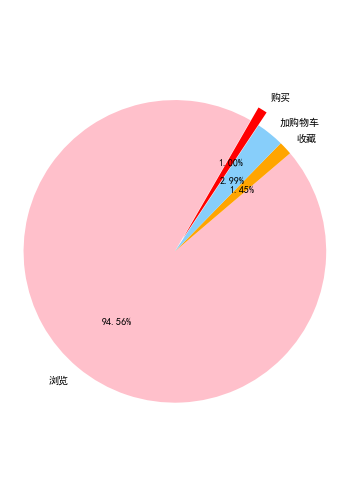

In [11]:
plt.figure(figsize=(6,9)) #调节图形大小
labels = ['浏览','收藏','加购物车','购买'] #定义标签
sizes = [94559,1448,2992,1001] #每块值
colors = ['pink','orange','lightskyblue','red']
explode = (0,0,0,0.1) 
patches,text1,text2 = plt.pie(sizes,
                      explode=explode,
                      colors=colors,
                      labels=labels,
                      autopct = '%.2f%%', 
                      shadow = False, 
                      startangle =60, 
                      pctdistance = 0.6) 
plt.axis('equal')
plt.show()

## 5. 计算用户转化率（Conversion Rate, CVR）
对于behavior_type变量进行计算。
$$用户转化率 = \frac {购买} {浏览+收藏+加购物车+购买}$$
### 5.1 每天转化率

In [12]:
user_behavior['CVR'] = user_behavior['购买']/user_behavior.sum(axis=1)
user_behavior.head(5)

,浏览,收藏,加购物车,购买,CVR
date,,,,,
2014-11-18,3584,51,96,27,0.007185
2014-11-19,2439,48,58,25,0.009728
2014-11-20,3174,60,47,31,0.009360
2014-11-21,3321,62,92,29,0.008276
2014-11-22,3735,69,83,23,0.005882


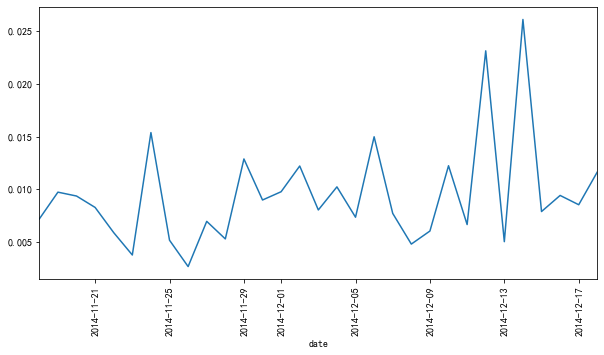

In [13]:
plt.figure(figsize=(10, 5))
user_behavior.CVR.plot(kind = 'line',rot = 90)
plt.show()

### 5.2 总体转化率

In [14]:
CVR_total = user_behavior.CVR.mean()
print("总体转化率：%.3f%%" % (CVR_total*100))

总体转化率：0.946%
